In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import matplotlib.image as mpimg
import imageio
import imgaug as ia
import imgaug.augmenters as img_augment
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras import datasets, layers, models
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, BatchNormalization, Conv2D, MaxPool2D, Activation, MaxPooling2D, Dropout,AveragePooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

In [4]:
#getting the current directory 
cur_dir = os.getcwd()
cur_dir
main_folder = cur_dir + "\\yoga_basics_data\\dataset\\"
main_folder

'C:\\Users\\Priya'

In [6]:
#reading the files 
img_paths=[]
for i in os.listdir(main_folder):
    for root, dirs, files in os.walk(main_folder+i):
        for f in files[:1]:    
            img_path =main_folder+i+"/"+f
            img_paths.append((img_path,i))


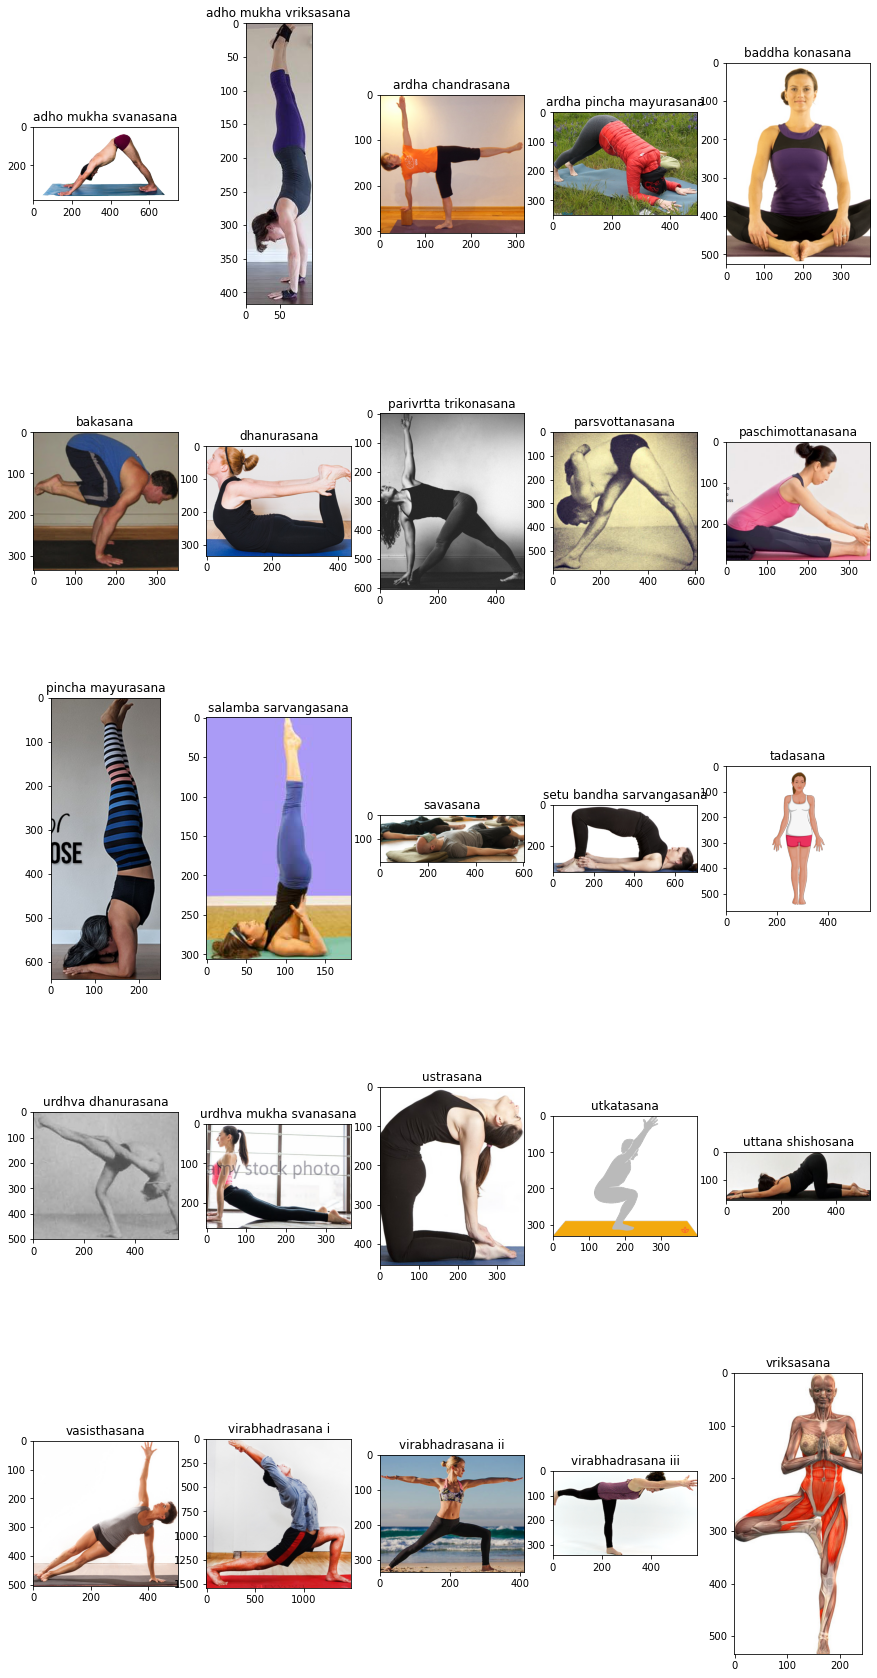

In [7]:
#displaying the images
plt.figure(figsize=(15,30))
for i in range(len(img_paths)):
    plt.subplot(5,5,i+1)
    plt.imshow(mpimg.imread(img_paths[i][0]))
    plt.title(img_paths[i][1])
plt.show()

In [8]:
WIDTH=100
HEIGHT=150

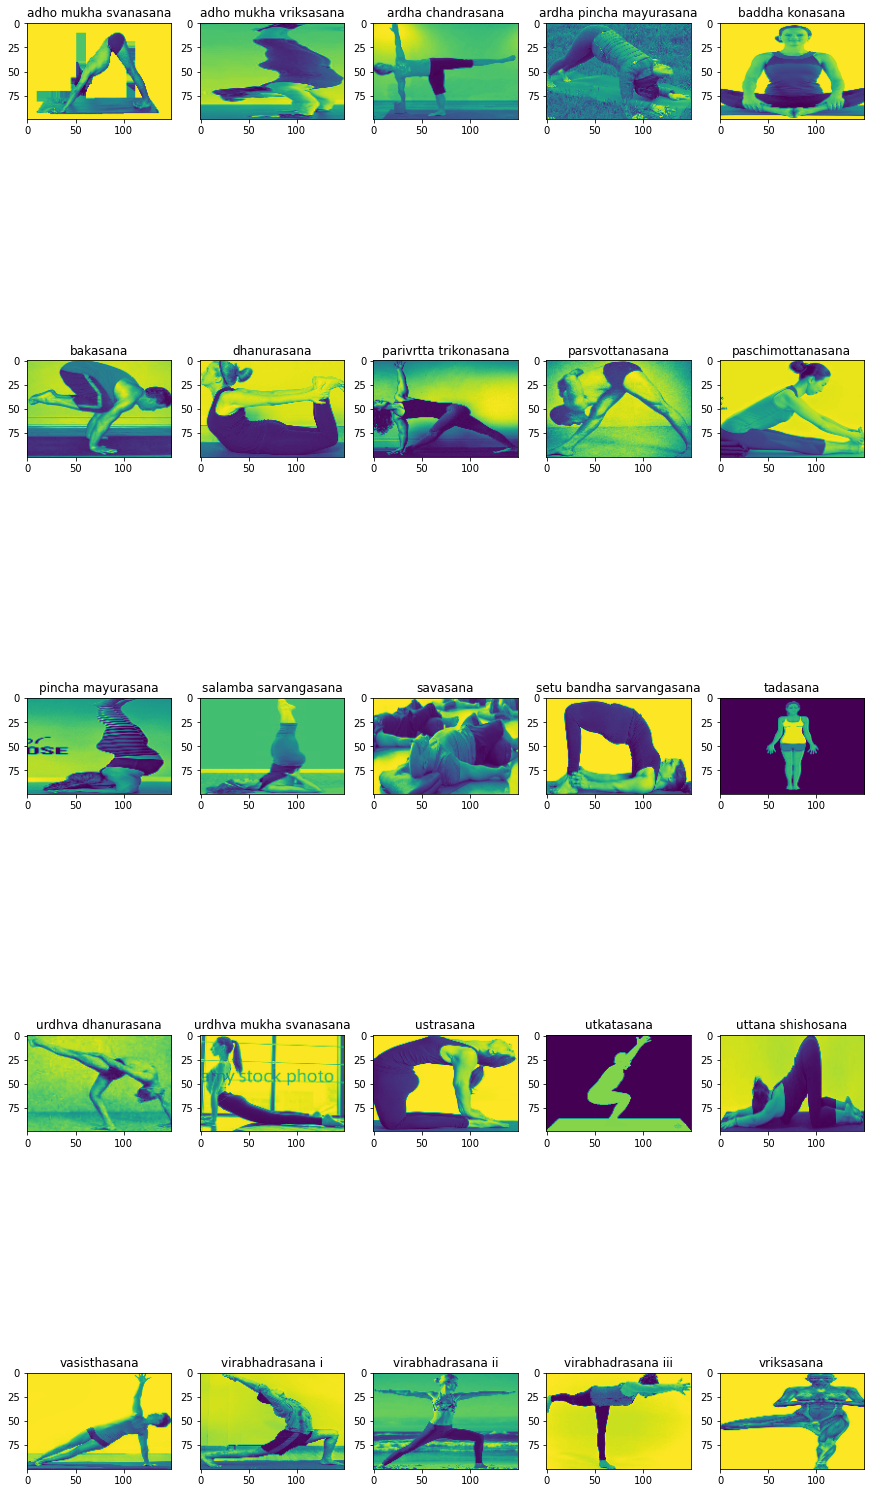

In [9]:
#Converting the images to grey scale
plt.figure(figsize=(15,30))
for i in range(len(img_paths)):
    plt.subplot(5,5,i+1)
    img = cv2.imread(img_paths[i][0],cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (HEIGHT,WIDTH))
    plt.imshow(img)
    plt.title(img_paths[i][1])
plt.show()

In [10]:
#data preprocessing
def createData(main_folder):
    img_data=[]
    class_data=[]
    for i in os.listdir(main_folder):
        for root, dirs, files in os.walk(main_folder+i):
            for f in files: 
                img_path =main_folder+i+"/"+f
                img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (HEIGHT,WIDTH))
                img = np.array(img).astype('float32')
                img = img/255
                img_data.append(img)
                class_data.append(i)
    return img_data, class_data

In [11]:
X, y = createData(main_folder)

In [12]:
#identifying the unique classes
unique_classes = np.unique(y)
len(unique_classes)
class_dict={}
for i in unique_classes:
    class_dict[i] = y.count(i)

25

In [46]:
class_dict

{'adho mukha svanasana': 69,
 'adho mukha vriksasana': 59,
 'ardha chandrasana': 52,
 'ardha pincha mayurasana': 47,
 'baddha konasana': 70,
 'bakasana': 77,
 'dhanurasana': 46,
 'parivrtta trikonasana': 62,
 'parsvottanasana': 35,
 'paschimottanasana': 56,
 'pincha mayurasana': 35,
 'salamba sarvangasana': 67,
 'savasana': 57,
 'setu bandha sarvangasana': 58,
 'tadasana': 56,
 'urdhva dhanurasana': 68,
 'urdhva mukha svanasana': 63,
 'ustrasana': 87,
 'utkatasana': 73,
 'uttana shishosana': 50,
 'vasisthasana': 74,
 'virabhadrasana i': 54,
 'virabhadrasana ii': 55,
 'virabhadrasana iii': 61,
 'vriksasana': 62}

In [18]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)

In [19]:
y

array([ 0,  0,  0, ..., 24, 24, 24], dtype=int64)

In [48]:
#saving the dictionary
import pickle
with open('saved_dictionary_25_yoga.pkl', 'wb') as f:
    pickle.dump(class_mapping, f)

In [20]:
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
class_mapping

{'adho mukha svanasana': 0,
 'adho mukha vriksasana': 1,
 'ardha chandrasana': 2,
 'ardha pincha mayurasana': 3,
 'baddha konasana': 4,
 'bakasana': 5,
 'dhanurasana': 6,
 'parivrtta trikonasana': 7,
 'parsvottanasana': 8,
 'paschimottanasana': 9,
 'pincha mayurasana': 10,
 'salamba sarvangasana': 11,
 'savasana': 12,
 'setu bandha sarvangasana': 13,
 'tadasana': 14,
 'urdhva dhanurasana': 15,
 'urdhva mukha svanasana': 16,
 'ustrasana': 17,
 'utkatasana': 18,
 'uttana shishosana': 19,
 'vasisthasana': 20,
 'virabhadrasana i': 21,
 'virabhadrasana ii': 22,
 'virabhadrasana iii': 23,
 'vriksasana': 24}

In [22]:
#converting to numpy array
X= np.array(X)
y= np.array(y)

In [23]:
#splitting into train, test and validation set
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=42, shuffle=True)

print("train_x shape: {}".format(train_x.shape))
print("train_y shape: {}\n".format(train_y.shape))

print("test_x shape: {}".format(test_x.shape))
print("test_y shape: {}".format(test_y.shape))

train_x shape: (1208, 100, 150)
train_y shape: (1208,)

test_x shape: (150, 100, 150)
test_y shape: (150,)


In [25]:
#model building
input_shape = (train_x.shape[1], train_x.shape[2], 1,)

In [26]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5),padding='same',strides=(1,1), input_shape=input_shape,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1)))
model.add(Conv2D(64, kernel_size=(5,5),padding='valid',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))
model.add(Conv2D(120, kernel_size=(5,5),padding='valid',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))


model.add(Flatten()) 
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(25,activation=tf.nn.softmax))

In [27]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 149, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 95, 145, 64)       51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 47, 72, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 68, 120)       192120    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 21, 34, 120)      0

In [28]:
#fitting the model
model.compile(optimizer=Adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), 
               epochs=30, batch_size=128, verbose=1)

Epoch 1/30
10/10 [==============================] - 53s 5s/step - loss: 3.5579 - accuracy: 0.0579 - val_loss: 3.1954 - val_accuracy: 0.0667
Epoch 2/30
10/10 [==============================] - 55s 5s/step - loss: 3.1245 - accuracy: 0.1192 - val_loss: 3.0480 - val_accuracy: 0.0667
Epoch 3/30
10/10 [==============================] - 55s 6s/step - loss: 2.6926 - accuracy: 0.2566 - val_loss: 2.6002 - val_accuracy: 0.2519
Epoch 4/30
10/10 [==============================] - 56s 6s/step - loss: 2.0173 - accuracy: 0.4454 - val_loss: 2.2914 - val_accuracy: 0.4148
Epoch 5/30
10/10 [==============================] - 56s 6s/step - loss: 1.4414 - accuracy: 0.6159 - val_loss: 2.2352 - val_accuracy: 0.5111
Epoch 6/30
10/10 [==============================] - 56s 6s/step - loss: 0.9667 - accuracy: 0.7326 - val_loss: 2.3199 - val_accuracy: 0.5111
Epoch 7/30
10/10 [==============================] - 56s 6s/step - loss: 0.6159 - accuracy: 0.8278 - val_loss: 2.4499 - val_accuracy: 0.5333
Epoch 8/30
10/10 [==

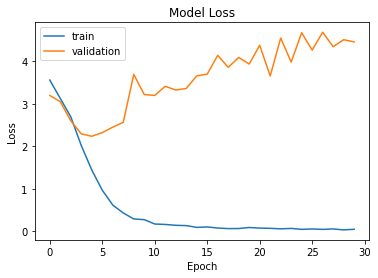

In [29]:
#plotting the training and validation loss for each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

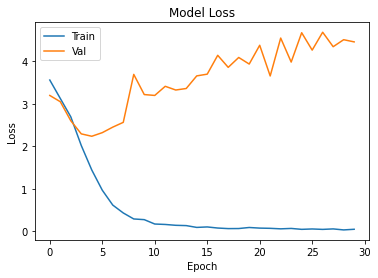

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.show()

In [31]:
model.metrics_names

['loss', 'accuracy']

In [32]:
model.evaluate(test_x, test_y)

5/5 [==============================] - 2s 355ms/step - loss: 2.7910 - accuracy: 0.6267


[2.791010856628418, 0.6266666650772095]

In [41]:
# evaluate model, get train/test accuracy
train_pred = np.argmax(model.predict(train_x), axis=1)
test_pred = np.argmax(model.predict(test_x), axis=1)
print("\nTraining accuracy using first CNN model: {}".format(accuracy_score(train_y, train_pred)))
print("Testing accuracy using first CNN model: {}\n".format(accuracy_score(test_y, test_pred)))


5/5 [==============================] - 1s 289ms/step

Training accuracy using first CNN model: 0.9975165562913907
Testing accuracy using first CNN model: 0.6266666666666667



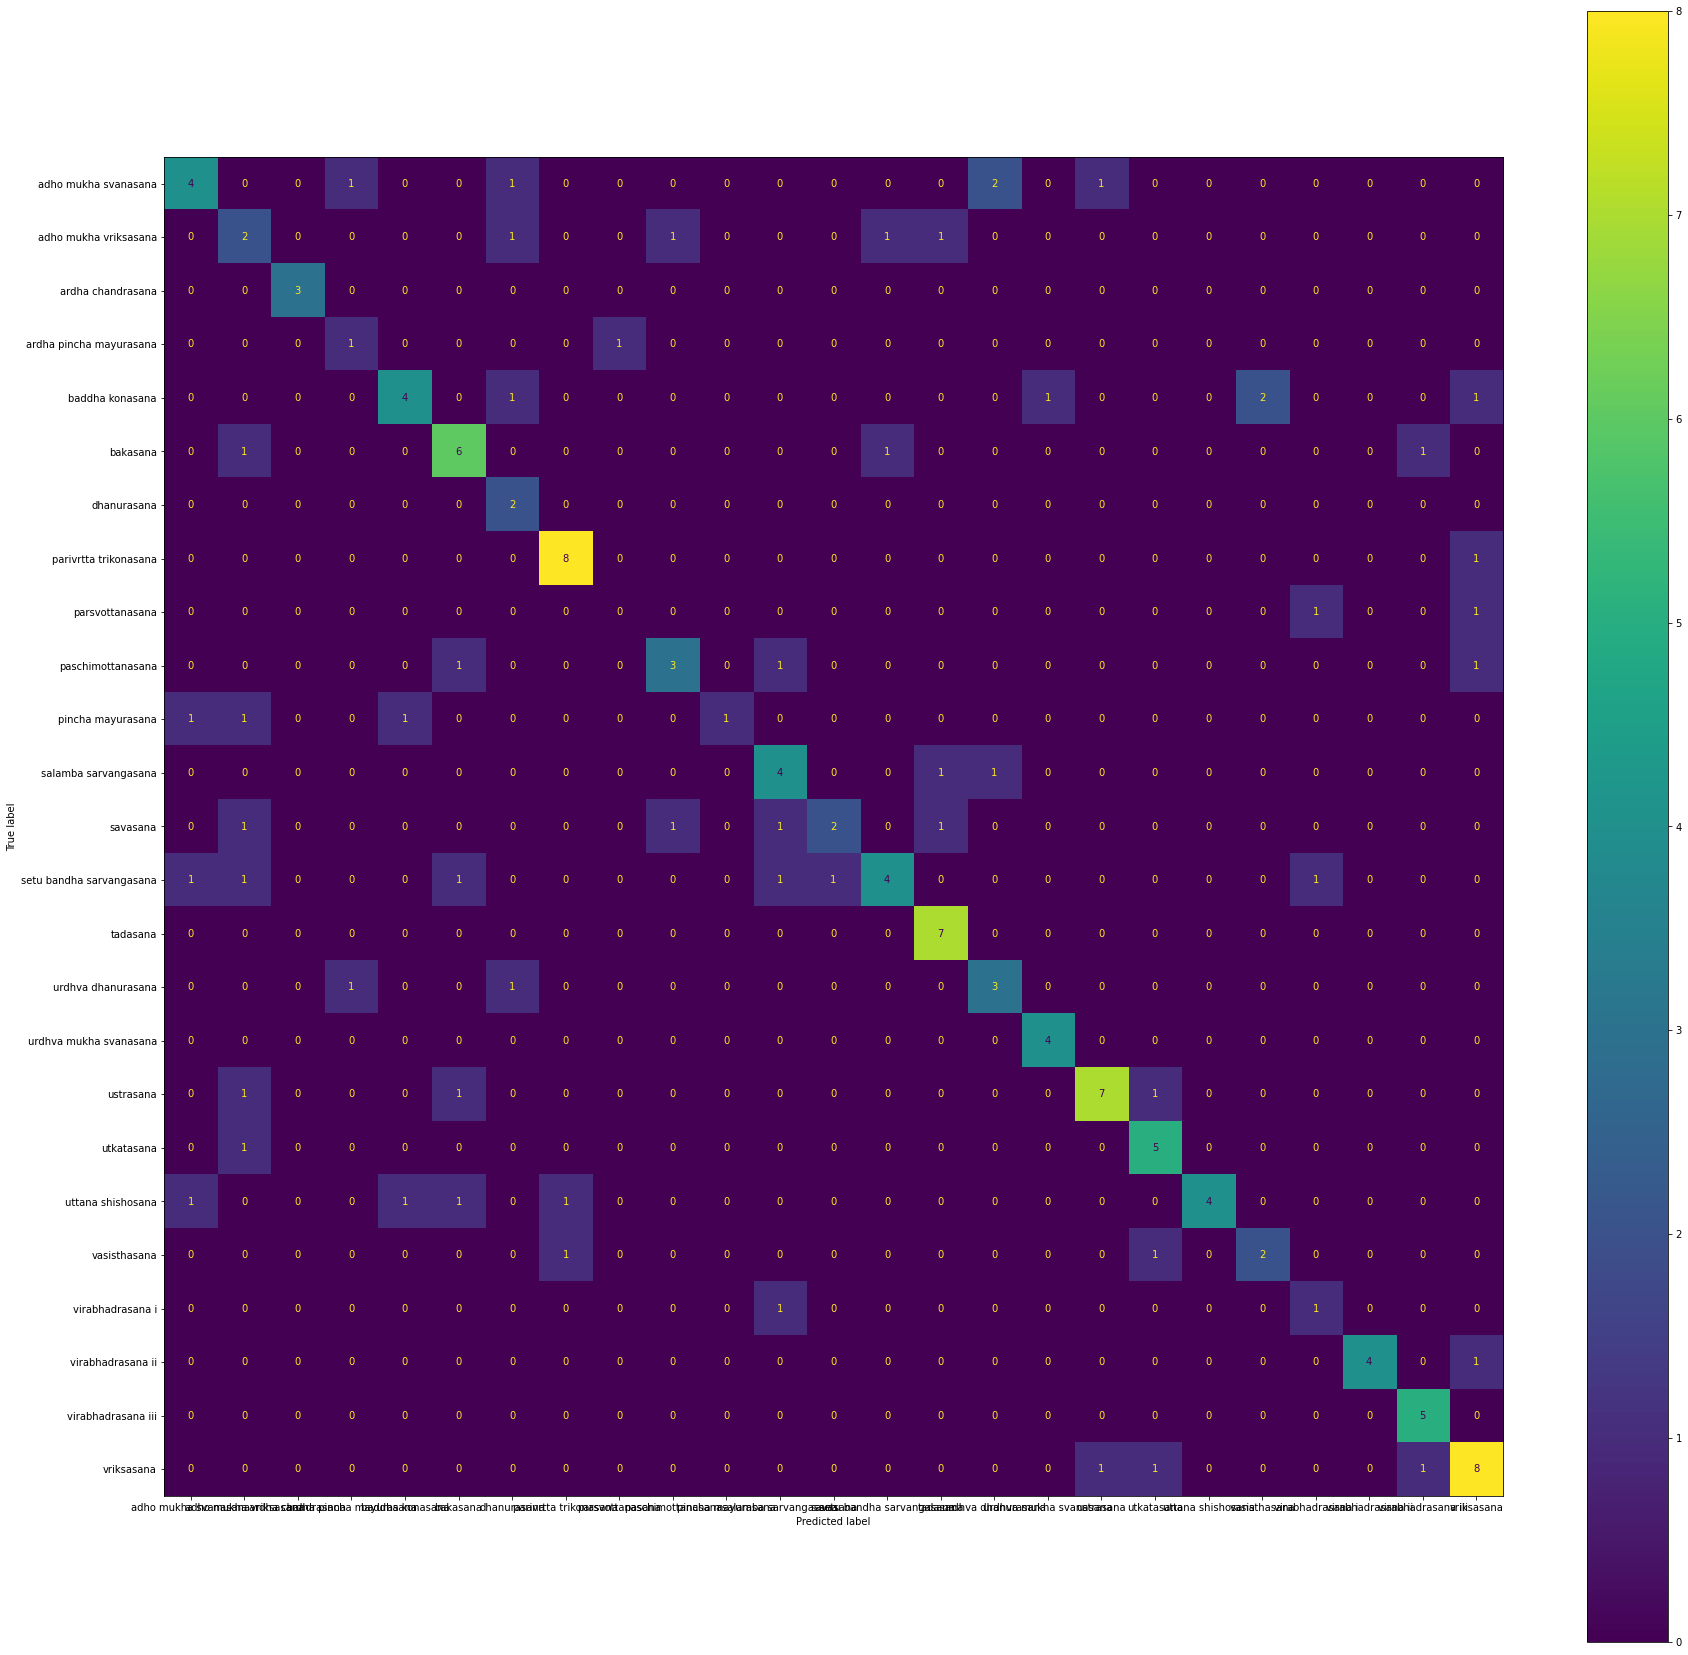

In [34]:
#confusion metrics for the model 
import sklearn.metrics as metrics
from matplotlib.pyplot import figure

confusion_matrix = metrics.confusion_matrix(test_y, test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = unique_classes)

fig, ax = plt.subplots(figsize=(30,30))
cm_display.plot(ax=ax)
plt.show()

In [35]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(test_y, test_pred, target_names=unique_classes, digits=4))

                          precision    recall  f1-score   support

    adho mukha svanasana     0.5714    0.4444    0.5000         9
   adho mukha vriksasana     0.2500    0.3333    0.2857         6
       ardha chandrasana     1.0000    1.0000    1.0000         3
 ardha pincha mayurasana     0.3333    0.5000    0.4000         2
         baddha konasana     0.6667    0.4444    0.5333         9
                bakasana     0.6000    0.6667    0.6316         9
             dhanurasana     0.3333    1.0000    0.5000         2
   parivrtta trikonasana     0.8000    0.8889    0.8421         9
         parsvottanasana     0.0000    0.0000    0.0000         2
       paschimottanasana     0.6000    0.5000    0.5455         6
       pincha mayurasana     1.0000    0.2500    0.4000         4
    salamba sarvangasana     0.5000    0.6667    0.5714         6
                savasana     0.6667    0.3333    0.4444         6
setu bandha sarvangasana     0.6667    0.4000    0.5000        10
         

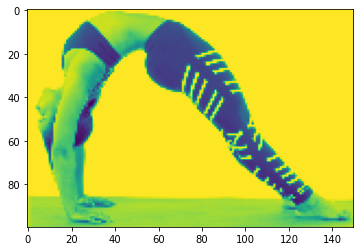

In [36]:
image_index = 1
plt.imshow(test_x[image_index])

In [37]:
#Predicting for a test sample using the model built using 25 asana
pred = model.predict(test_x[image_index].reshape(1,WIDTH, HEIGHT))
#printing the probability for each class
print("Class Probabilities:-")
for i in range(pred.shape[1]):
    print (i,pred[0,i])
    
act_val = test_y[image_index]
act_class = list(class_mapping.keys())[list(class_mapping.values()).index(act_val)]

print("\nActual Value:",test_y[image_index])
print("Actual Vlass:",act_class,"\n")

#printing the actual vs predicted class
pred_val = pred.argmax()
pred_class = list(class_mapping.keys())[list(class_mapping.values()).index(pred_val)]
print("Predicted Value is: ",pred_val)
print("Predicted Class is: ",pred_class)

1/1 [==============================] - 0s 30ms/step
Class Probabilities:-
0 0.00020859425
1 1.995259e-06
2 1.0463359e-08
3 2.4707097e-08
4 6.4005404e-13
5 0.00017014367
6 2.2988327e-09
7 2.2499376e-15
8 1.5193237e-11
9 1.7653111e-13
10 4.595844e-09
11 1.7015814e-11
12 3.1787288e-12
13 1.5770706e-06
14 1.1264532e-13
15 0.9996081
16 9.4838715e-06
17 5.7585536e-10
18 1.244821e-14
19 3.8505135e-15
20 1.931812e-10
21 2.9220156e-16
22 1.5505831e-13
23 1.7514519e-07
24 1.522266e-10

Actual Value: 15
Actual Vlass: urdhva dhanurasana 

Predicted Value is:  15
Predicted Class is:  urdhva dhanurasana


In [38]:
# checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

In [39]:
model.save('cnn_yoga_basics_model_shuffled')

INFO:tensorflow:Assets written to: cnn_yoga_basics_model_shuffled\assets


INFO:tensorflow:Assets written to: cnn_yoga_basics_model_shuffled\assets


In [40]:
from tensorflow import keras
model_loaded = keras.models.load_model('cnn_yoga_basics_model_shuffled')

In [42]:
#calculating the test accuracy
test_pred_nn = np.argmax(model_loaded.predict(test_x), axis=1)
print("Testing accuracy using first CNN model: {}\n".format(accuracy_score(test_y, test_pred_nn)))

5/5 [==============================] - 1s 242ms/step
Testing accuracy using first CNN model: 0.6266666666666667

